In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import watershed as skwater

In [2]:
image=cv2.imread('C:/Users/raksh/OneDrive/Documents/Desktop/Datasets/brain3.png')

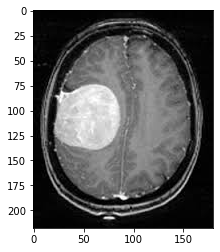

In [3]:
plt.imshow(image)
plt.show()

In [4]:
def showimg(title,img,ctype):
  plt.figure(figsize=(5, 5))
  if ctype=='bgr':
    bgr=cv2.split(img)      
    rgb_image=cv2.merge([r,g,b])     
    plt.imshow(rgb_image)
  elif ctype=='hsv':
    rgb=cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour")

  plt.title(title)
  plt.show()

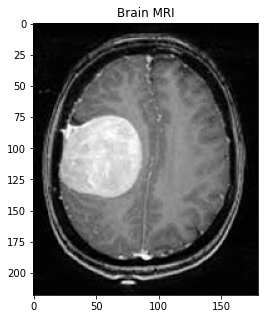

In [5]:
grayimg=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
showimg('Brain MRI',grayimg,'gray')

# Median Filtering

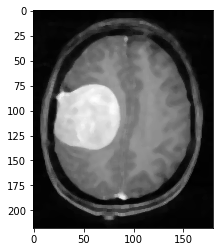

In [6]:
median_filter=cv2.medianBlur(grayimg,5)
plt.imshow(median_filter,cmap='gray')
plt.show()

# Thresholding Technique

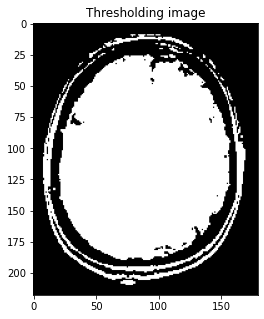

In [7]:
ret,thresh=cv2.threshold(grayimg,0,255,cv2.THRESH_OTSU)
showimg('Thresholding image',thresh,'gray')

In [8]:
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=3)

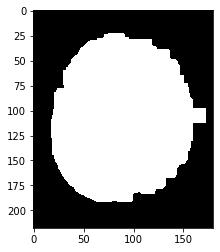

In [9]:
surebg=cv2.dilate(opening,kernel,iterations=3)
plt.imshow(surebg,cmap='gray')
plt.show()

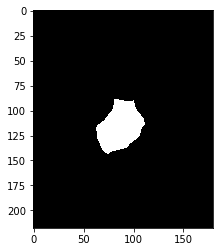

In [11]:
distance_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,surefg=cv2.threshold(distance_transform,0.7*distance_transform.max(),255,0)

plt.imshow(surefg,cmap='gray')
plt.show()

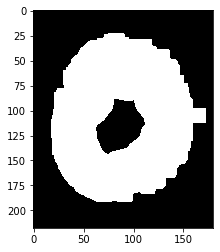

In [12]:
surefg=np.uint8(surefg)
unknownregion=cv2.subtract(surebg,surefg)

plt.imshow(unknownregion,cmap='gray')
plt.show()

# WaterShed Segmentation

In [13]:
ret,markers=cv2.connectedComponents(surefg)
markers=markers+1

markers[unknownregion==255]=0
markers=cv2.watershed(image,markers)
image[markers== -1]=[255,0,0]

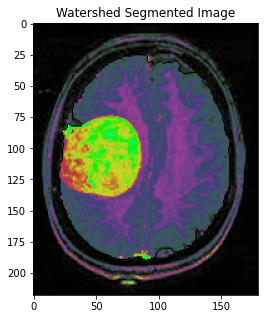

In [14]:
image2=cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
showimg('Watershed Segmented Image',image2,'gray')

In [15]:
ret,markers=cv2.connectedComponents(thresh)
marker_area=[np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
large=np.argmax(marker_area)+1

maskimg=markers==large
brainarea=image.copy()
brainarea[maskimg==False] = (0,0,0)

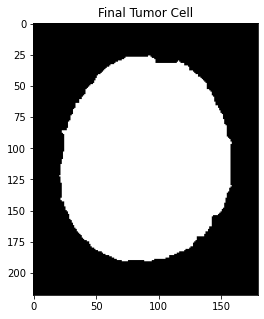

In [16]:
maskimg = np.uint8(maskimg)
kernel=np.ones((8,8),np.uint8)
closing=cv2.morphologyEx(maskimg,cv2.MORPH_CLOSE,kernel)
showimg('Final Tumor Cell',closing,'gray')